In [1]:
#normal imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Changing the colors and outlines of individual bars

In [39]:
df = pd.DataFrame({'a':[1,2,3,4,5,6], 'b':[4,5,6,5,7,1], 'c':[-3,-4,-5,-7,-6,-1]})

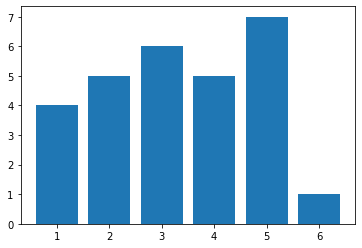

In [34]:
fig, ax = plt.subplots()
ax.bar(df.a, df.b)
plt.show()

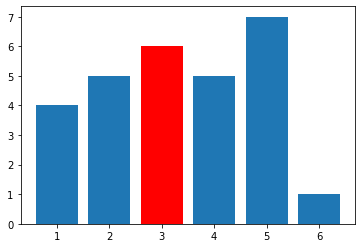

In [35]:
fig, ax = plt.subplots()
ax.bar(df.a, df.b, color='blue') #huh... this defaults to orange, and 'black' turns them blue?
ax.bar(df.a, df.b)[2].set_facecolor("red")
plt.show()

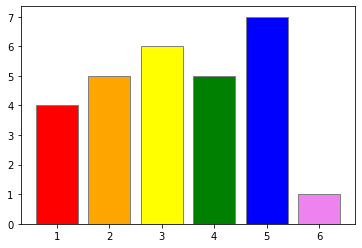

In [36]:
fig, ax = plt.subplots()
ax.bar(df.a, df.b, color=['red', 'orange', 'yellow', 'green', 'blue', 'violet'], edgecolor='gray') 
plt.show()

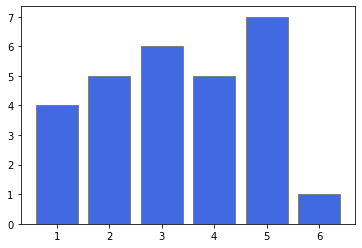

In [37]:
fig, ax = plt.subplots()
ax.bar(df.a, df.b, 
       color='royalblue', 
       edgecolor='gray',
       linewidth=1) 
plt.show()

Each of the attributes can be treated as a list.  The list will repeat if it does not match the length of your data

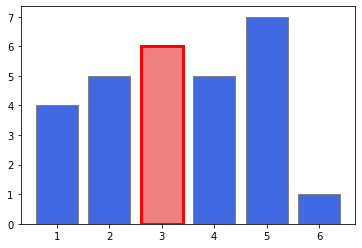

In [38]:
fig, ax = plt.subplots()
ax.bar(df.a, df.b, 
       color=['royalblue', 'royalblue', 'lightcoral', 'royalblue', 'royalblue'], 
       edgecolor=['gray', 'gray', 'red', 'gray', 'gray', 'gray'],
       linewidth=[1, 1, 3, 1, 1, 1]) 
plt.show()

# Two Y-axis plots

In [78]:
df = pd.DataFrame({'a':[1,2,3,4,5,6], 'b':[4,5,6,5,7,1], 'c':[-3,-4,-5,-7,-6,-1]})

## Matplotlib

twinx() - Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right). <br>The x-axis autoscale setting will be inherited from the original Axes.

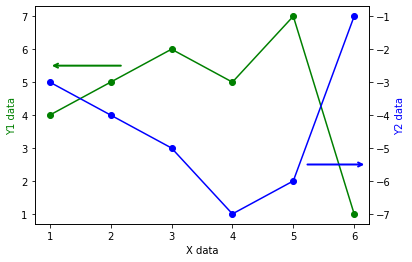

In [89]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.a, df.b, 'green', marker='o')
ax2.plot(df.a, df.c, 'blue', marker='o')

#set labels
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='green')
ax2.set_ylabel('Y2 data', color='blue')

# add arrows
ax1.annotate('', xy=(1,5.5), xytext=(2.2,5.5), arrowprops=dict(arrowstyle='->', linewidth=2, color='green'))
ax2.annotate('', xy=(6.2,-5.5), xytext=(5.2,-5.5), arrowprops=dict(arrowstyle='->', linewidth=2, color='blue'))

plt.show()

# Pandas

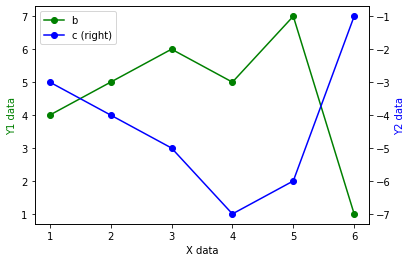

In [95]:
ax = df.plot(x='a', y='b', color='green', style='-o')
ax2 = df.plot(x='a', y='c', secondary_y=True,color='blue', style='-o', ax=ax)

ax.set_xlabel('X data')
ax.set_ylabel('Y1 data', color='green')
ax2.set_ylabel('Y2 data', color='blue')

plt.show()

# Using Arrows to annotate

## Matplotlib

'arrow' can be used, but it takes a bit of work to get it looking right.  This is because you set the coordinates for the base, and then provide lengths in x and y from there.  To use it to point to a specific datapoint, you usually have to back off the numbers manually so that the arrow doesn't overlap your data point too much

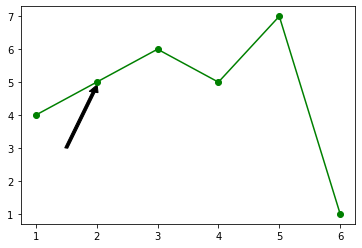

In [79]:
fig, ax = plt.subplots()
ax.plot(df.a, df.b, 'green', marker='o')
ax.arrow(x=1.5, y=3, dx=.45, dy=1.7, capstyle='butt', width=.05, color='black')
plt.show()

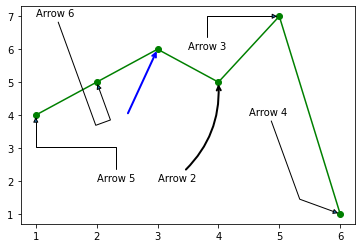

In [68]:
fig, ax = plt.subplots()
ax.plot(df.a, df.b, 'green', marker='o')
ax.annotate('', xy=(3,6), xytext=(2.5,4), arrowprops=dict(arrowstyle='->', linewidth=2, color='blue'))
ax.annotate('Arrow 2', xy=(4,5), xytext=(3,2), arrowprops=dict(arrowstyle='->', linewidth=2, connectionstyle='arc3, rad=0.25'))
ax.annotate('Arrow 3', xy=(5,7), xytext=(3.5,6), arrowprops=dict(arrowstyle='-|>', connectionstyle='angle, angleA=90, angleB=0'))
ax.annotate('Arrow 4', xy=(6,1), xytext=(4.5,4), arrowprops=dict(arrowstyle='-|>', connectionstyle='angle, angleA=-70, angleB=-20'))
ax.annotate('Arrow 5', xy=(1,4), xytext=(2,2), arrowprops=dict(arrowstyle='-|>', connectionstyle='bar, fraction=.3, angle=0'))
ax.annotate('Arrow 6', xy=(2,5), xytext=(1,7), arrowprops=dict(arrowstyle='-|>', connectionstyle='bar, fraction=.5, angle=20'))
plt.show()

You can flip the arrow direction by changing '->' to '<-'
connectionstyle - use + or - rad to change the side of curvature
AngleA = 0 means horizontal, 90 means vertical.  This is the first segment coming from the text
in bar, fraction gives distance along angle before turning to make connections.  Can use negative numbers, or alter angle to (+/-180) of current value
https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch <br>
https://matplotlib.org/stable/gallery/text_labels_and_annotations/fancyarrow_demo.html

# Adding Color Fill

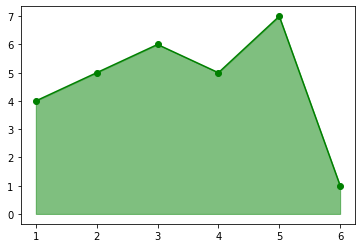

In [98]:
fig, ax = plt.subplots()
ax.plot(df.a, df.b, 'green', marker='o')
ax.fill_between(df.a, df.b, 0, color='green', alpha=0.5)
plt.show()

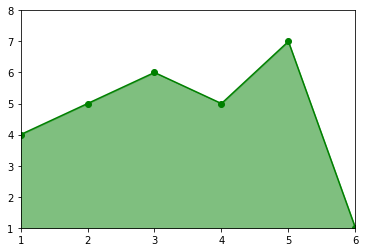

In [102]:
fig, ax = plt.subplots()
ax.plot(df.a, df.b, 'green', marker='o')
ax.fill_between(df.a, df.b, 0, color='green', alpha=0.5)
plt.axis([df.a.min(), df.a.max(), df.b.min(), df.b.max()+1])
plt.show()

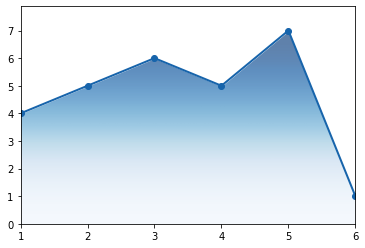

In [50]:
from matplotlib import cm

fig, ax = plt.subplots()
ax.plot(df.a, df.b, '#1764ab', marker='o', lw=2) 
plt.imshow([[.8, .8], [0, 0]],  cmap = cm.Blues, extent = [df.a.min(), df.a.max(), df.b.min()-1, df.b.max()], interpolation = "bicubic", alpha = .65, aspect = "auto")
ax.fill_between(df.a, df.b.max()+0.5, df.b, color='white') 
plt.show()

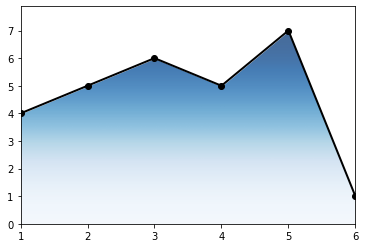

In [106]:
from matplotlib import cm

fig, ax = plt.subplots()
ax.plot(df.a, df.b, 'black', marker='o', lw=2) 
plt.imshow(X=[[.8, .8], [0, 0]],  cmap = cm.Blues, extent = [df.a.min(), df.a.max(), df.b.min()-1, df.b.max()], interpolation = "bicubic", alpha = .75, aspect = "auto")
ax.fill_between(df.a, df.b.max()+0.5, df.b, color='white') 
plt.show()

In [52]:
import matplotlib.colors as mcolors
print(mcolors.to_hex(cm.Blues(0.8)))

#1764ab


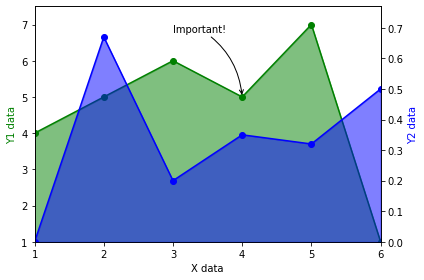

In [122]:
df = pd.DataFrame({'a':[1,2,3,4,5,6], 'b':[4,5,6,5,7,1], 'c':[0,.67,.2,.35,.32,.5]})

fig, ax1 = plt.subplots()

# set up second axis
ax2 = ax1.twinx()
ax1.plot(df.a, df.b, 'green', marker='o')
ax2.plot(df.a, df.c, 'blue', marker='o')

# add fill
ax1.fill_between(df.a, 0, df.b, color='green', alpha=0.5) 
ax2.fill_between(df.a, 0, df.c, color='blue', alpha=0.5) 

#add arrows
ax1.annotate('Important!', xy=(4,5), xytext=(3,6.8), arrowprops=dict(arrowstyle='->', linewidth=1, connectionstyle='arc3, rad=-0.25'))

# add axis labels and limits
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='green')
ax2.set_ylabel('Y2 data', color='blue')
ax1.axis([df.a.min(), df.a.max(), df.b.min(), df.b.max()+0.5])
ax2.axis([df.a.min(), df.a.max(), df.c.min(), df.c.max()+.1])

plt.show()